In [1]:
from mne.io import read_raw_eeglab

from pycrostates.cluster import ModKMeans
from pycrostates.datasets import lemon


# load sample dataset
raw_fname = lemon.data_path(subject_id='010017', condition='EC')
raw = read_raw_eeglab(raw_fname, preload=True)
raw.crop(0, 10)  # crop the dataset to speed up computation
raw.pick('eeg')  # select EEG channels
raw.set_eeg_reference('average')  # Apply a common average reference

Reading /Users/tivadarr/pycrostates_data/PREPROCESSED_LEMON/sub-010017_EC.fdt


Reading 0 ... 119451  =      0.000 ...   477.804 secs...


EEG channel type selected for re-referencing


Applying average reference.


Applying a custom ('EEG',) reference.


/var/folders/q_/gx1v2nr50b96f32msm335gdm0000gn/T/ipykernel_21733/2156721480.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(raw_fname, preload=True)
/var/folders/q_/gx1v2nr50b96f32msm335gdm0000gn/T/ipykernel_21733/2156721480.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(raw_fname, preload=True)


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,64 points
Good channels,61 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,0.00 Hz
Lowpass,125.00 Hz


In [2]:
n_clusters = 5
ModK = ModKMeans(n_clusters=n_clusters, random_state=42)

In [3]:
ModK.fit(raw, n_jobs=5)

/Users/tivadarr/anaconda3/envs/microstates/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


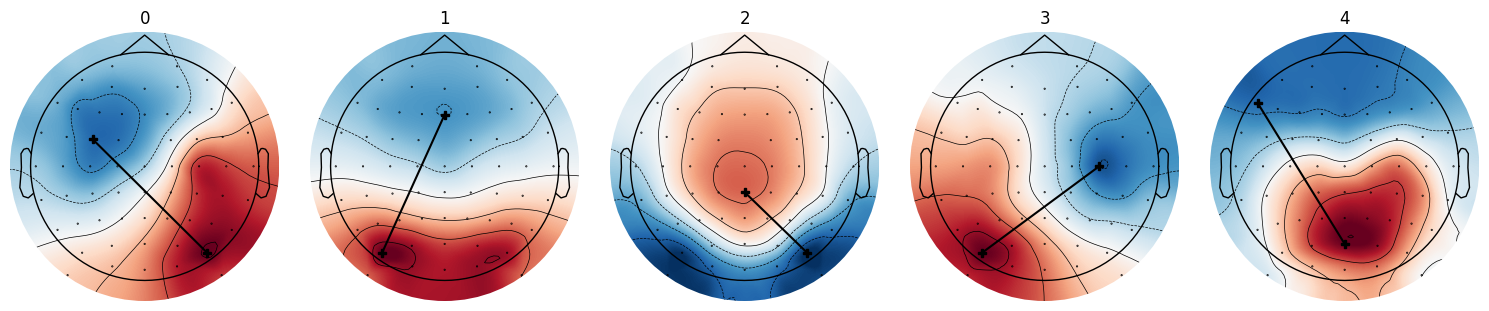

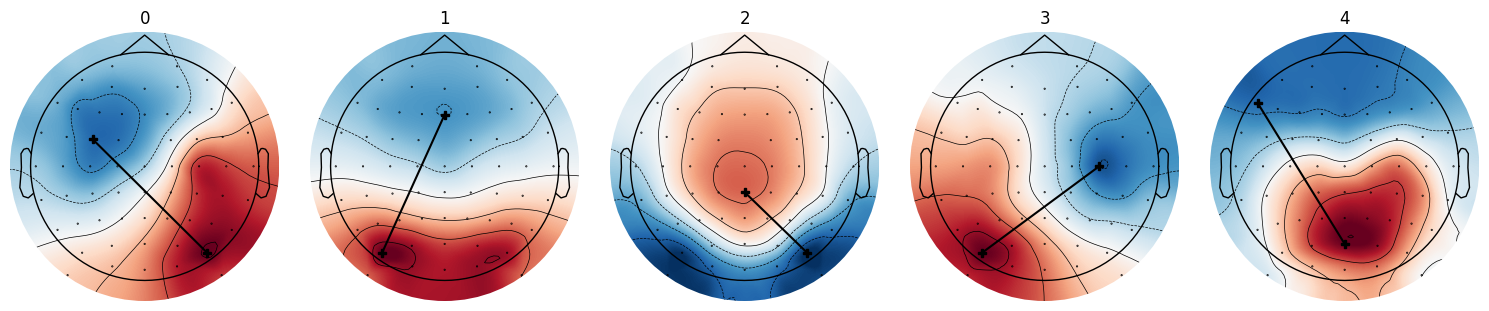

In [4]:
ModK.plot(show_gradient=True)

In [5]:
ModK.cluster_centers_

array([[-0.10613817, -0.08201757, -0.12199506, -0.18139598, -0.15155429,
        -0.0663304 ,  0.02897557, -0.14330831, -0.18287982, -0.04394161,
         0.08147253, -0.09112043, -0.17166961, -0.08167475,  0.18571105,
         0.14984234, -0.08960343, -0.05970102,  0.07963704,  0.20116081,
        -0.13068572, -0.01966152, -0.02754429,  0.04342553,  0.17641103,
         0.21959322,  0.05706008,  0.07466215,  0.11798016,  0.19335687,
         0.18025677, -0.1144574 , -0.1478337 , -0.09806771, -0.04387633,
        -0.17137089, -0.18059281, -0.11470747, -0.02275574, -0.12266696,
        -0.19038825,  0.06154834,  0.09349215, -0.12954759, -0.13551292,
         0.03178528,  0.17005063, -0.06435352, -0.10106101, -0.00582698,
         0.17539028,  0.17856175, -0.0303554 ,  0.00050519,  0.10891339,
         0.21417162,  0.03736816,  0.04401132,  0.09312374,  0.18100948,
         0.24512021],
       [-0.13111746, -0.12902983, -0.11675051, -0.15042743, -0.16057124,
        -0.1403919 , -0.09526

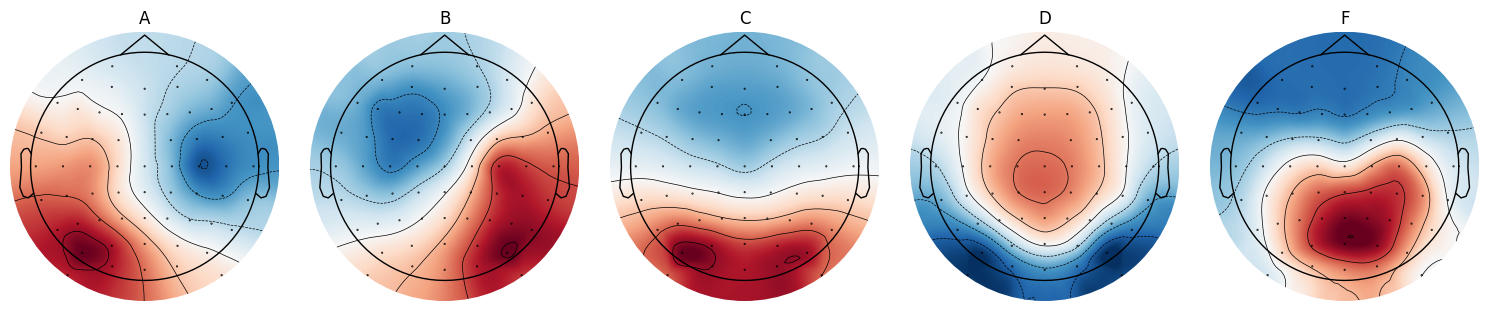

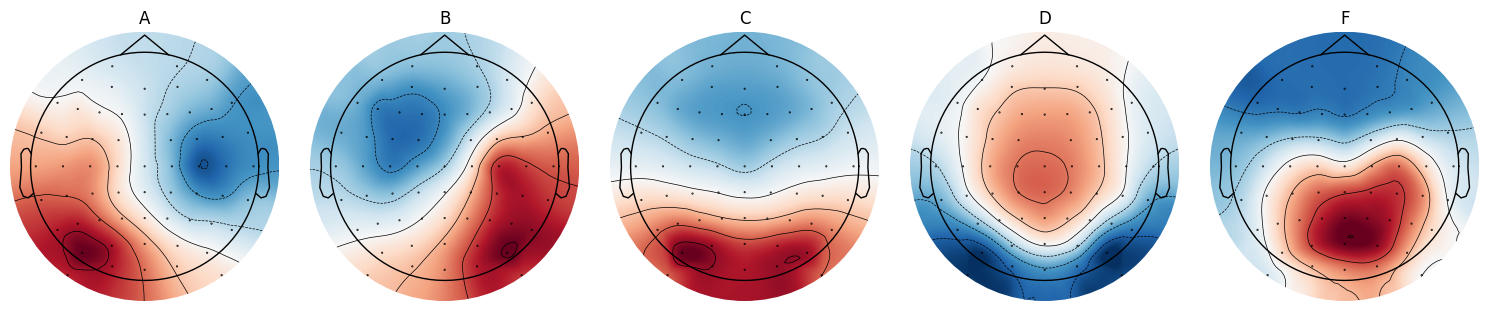

In [6]:
ModK.reorder_clusters(order=[3, 0, 1, 2, 4])
ModK.rename_clusters(new_names=['A', 'B', 'C', 'D', 'F'])
ModK.plot()

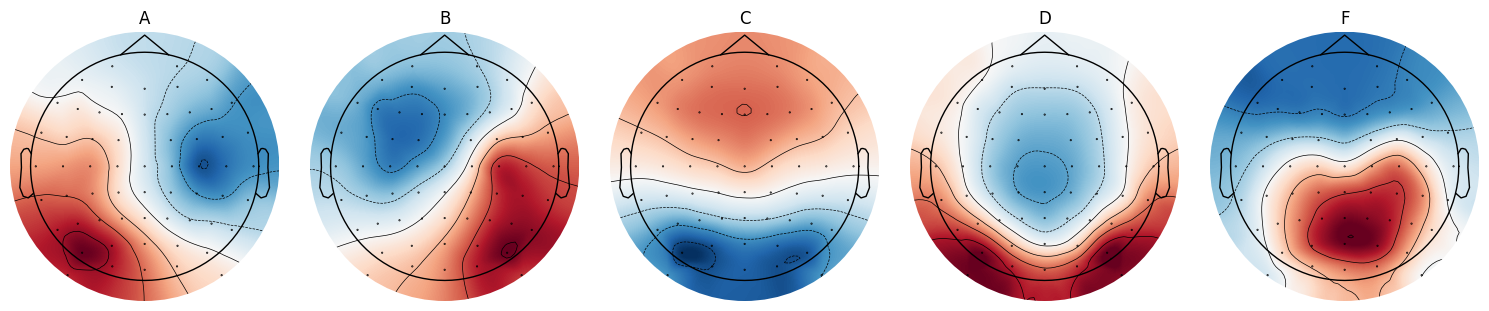

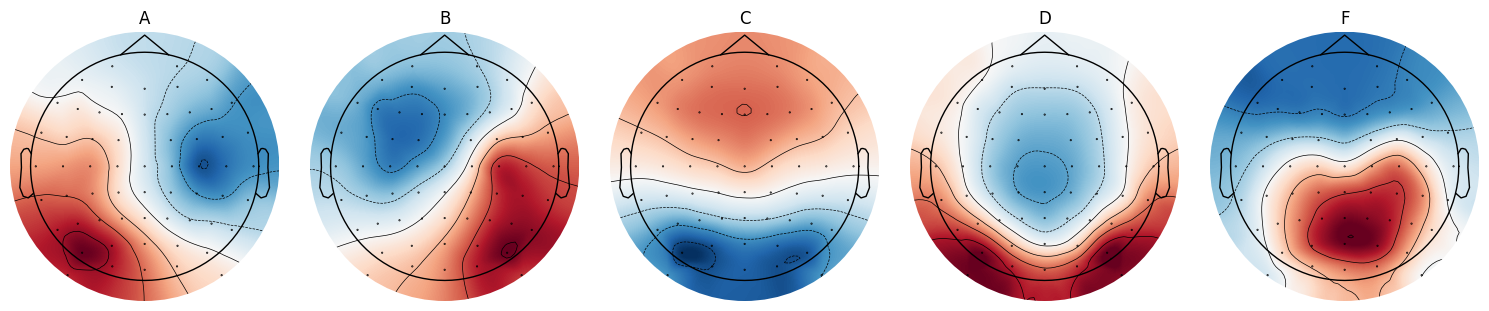

In [7]:
ModK.invert_polarity([False, False, True, True, False])
ModK.plot()